In [ ]:
import pandas as pd
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import missingno
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI/OnlineRetail.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
df['CustomerID'].nunique()

4372

<Axes: >

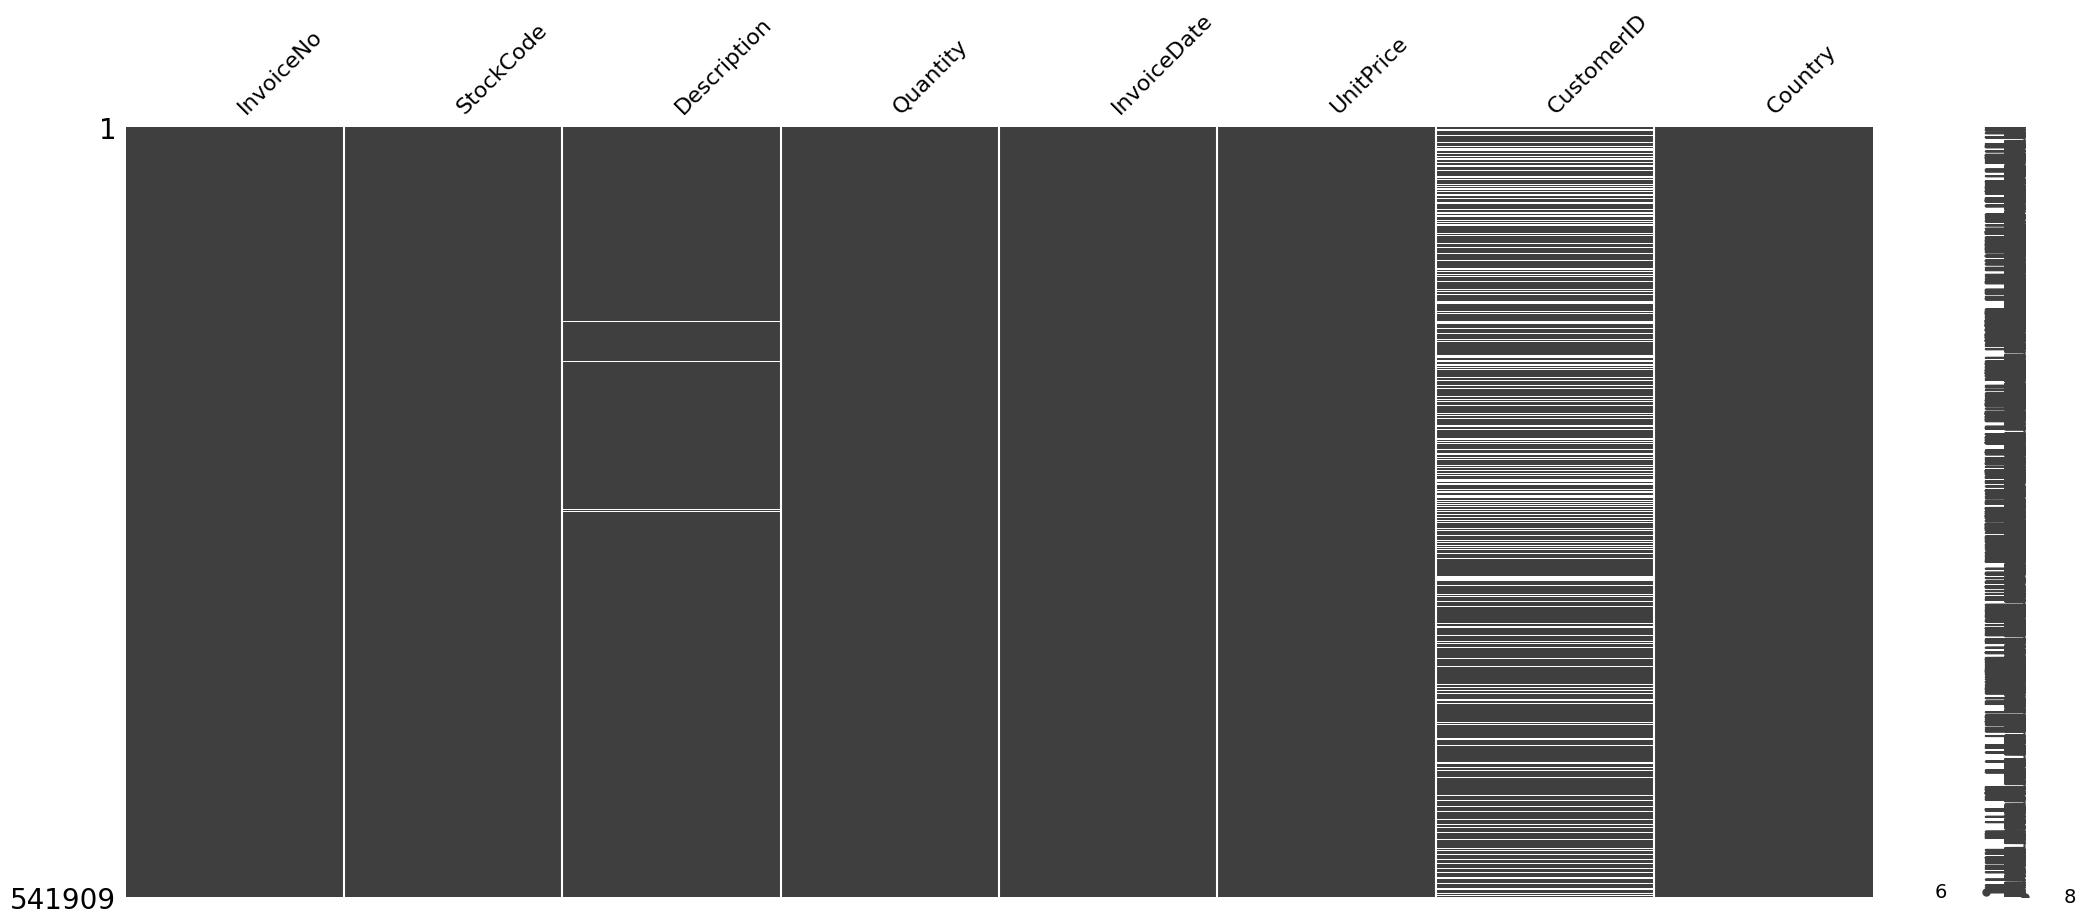

In [ ]:
missingno.matrix(df)

In [ ]:
numerical = list(df.select_dtypes(include=['int64', 'float64']).columns)

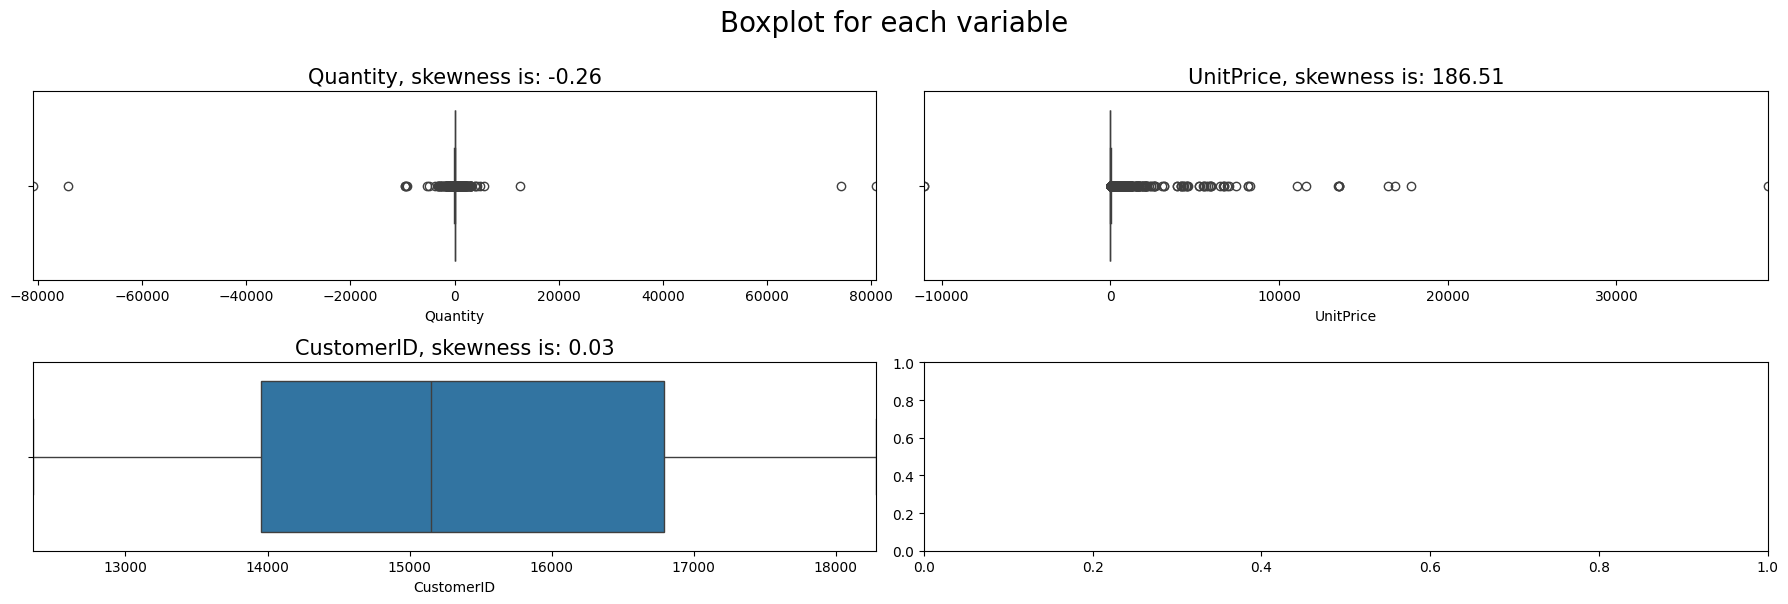

In [ ]:
# Boxplot for each variable in numerical list

def boxplots_visual(data,column):
    fig, ax = plt.subplots(2,2,figsize=(18,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()

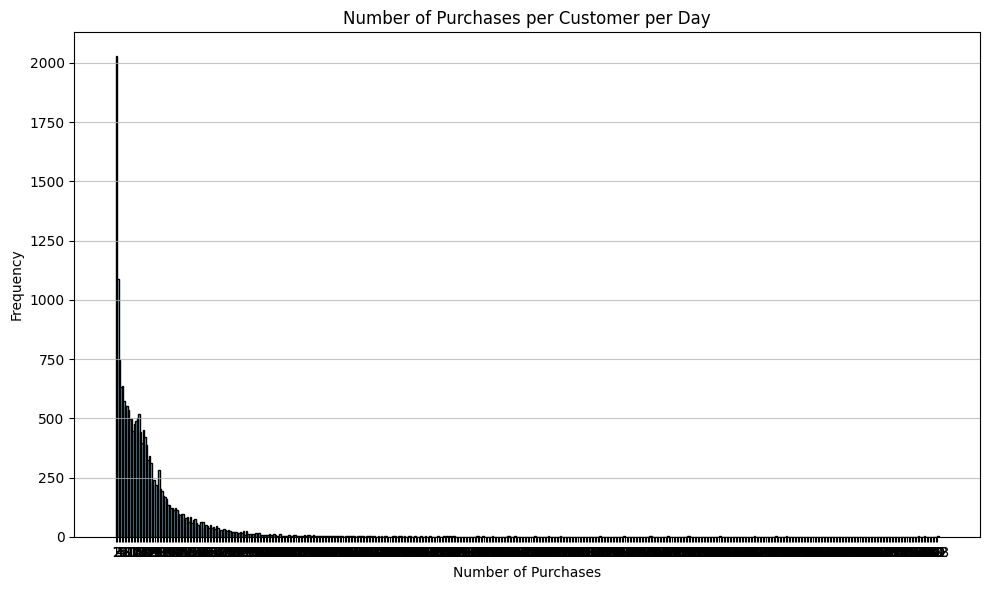

In [ ]:
# Convert 'InvoiceDate' column to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract date from 'InvoiceDate'
df['Date'] = df['InvoiceDate'].dt.date

# Group the data by 'CustomerID' and 'Date' and count the number of purchases
purchases_by_customer = df.groupby(['CustomerID', 'Date']).size().reset_index(name='Purchases')

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(purchases_by_customer['Purchases'], bins=range(1, purchases_by_customer['Purchases'].max() + 2), color='skyblue', edgecolor='black')
plt.title('Number of Purchases per Customer per Day')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xticks(range(1, purchases_by_customer['Purchases'].max() + 1))
plt.tight_layout()
plt.show()

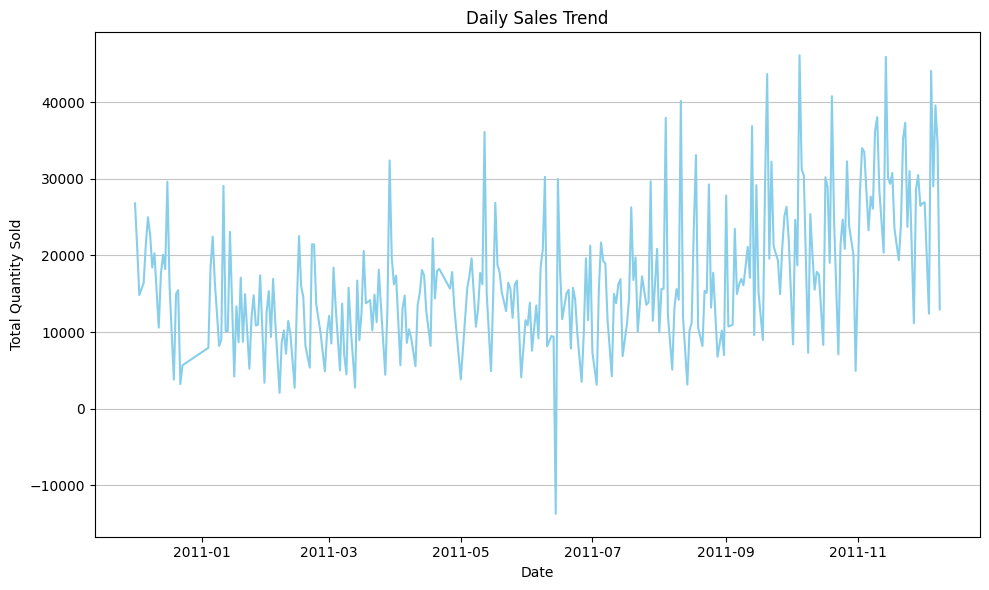

In [ ]:
# Group the data by 'Date' and sum the 'Quantity' to get daily sales
daily_sales = df.groupby('Date')['Quantity'].sum()

# Plotting
plt.figure(figsize=(10, 6))
daily_sales.plot(color='skyblue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


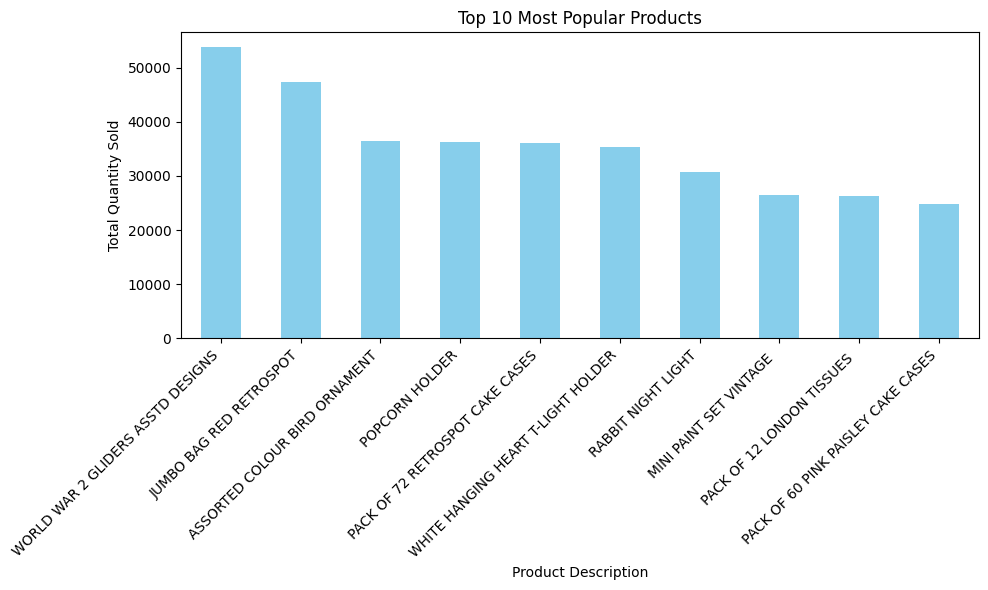

In [ ]:
# Group the data by 'Description' and sum the 'Quantity' to get total sales for each product
product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


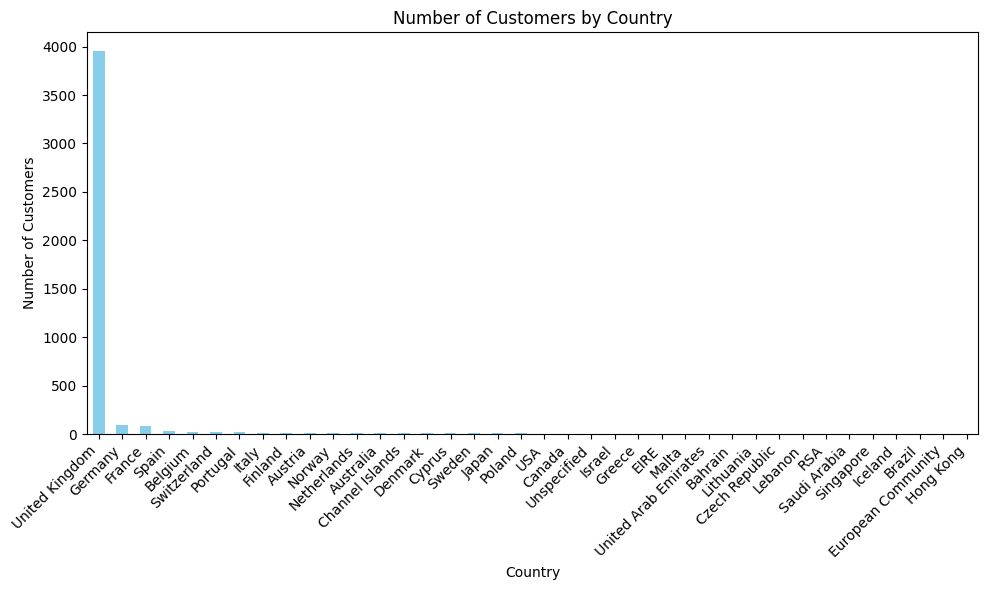

In [ ]:
# Count the number of unique customers in each country
customer_count_by_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
customer_count_by_country.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


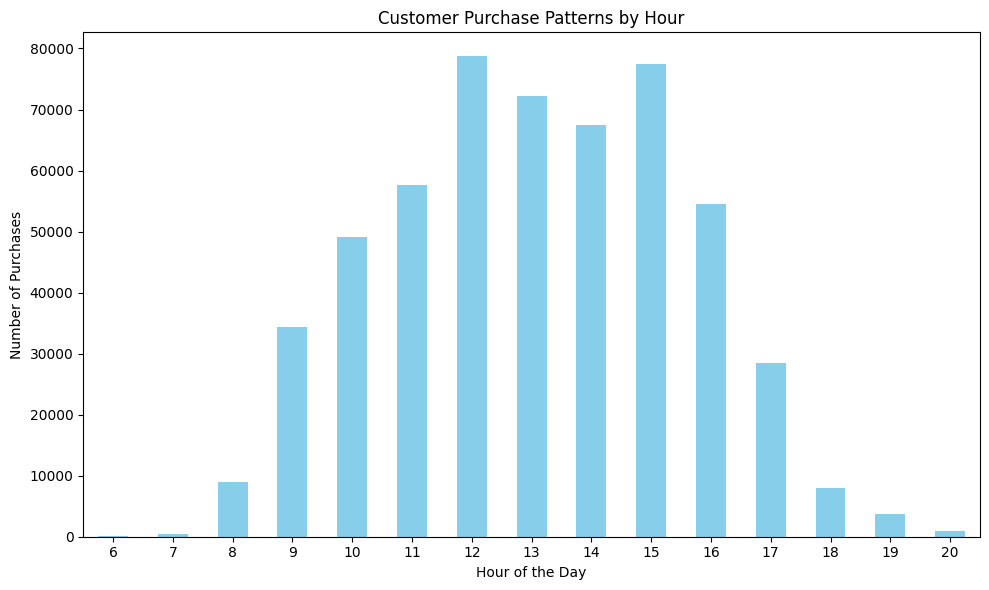

In [ ]:
# Extract hour from 'InvoiceDate'
df['Hour'] = df['InvoiceDate'].dt.hour

# Group the data by 'Hour' and count the number of purchases
hourly_purchases = df.groupby('Hour').size()

plt.figure(figsize=(10, 6))
hourly_purchases.plot(kind='bar', color='skyblue')
plt.title('Customer Purchase Patterns by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

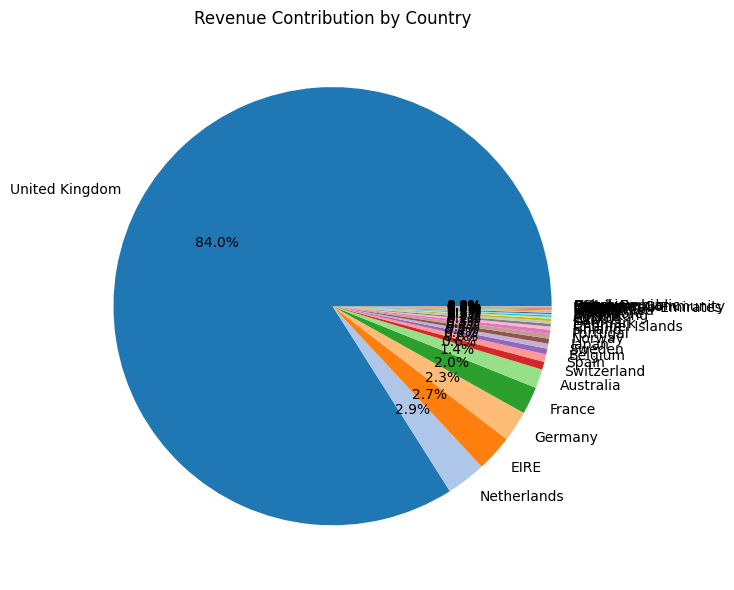

In [ ]:
# Calculate total revenue for each country
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']
revenue_by_country = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
revenue_by_country.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Revenue Contribution by Country')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
#missing values in Description replaced with string 'Unknown'
df['Description'].fillna('Unknown', inplace=True)

print(df.isnull().sum())

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      135080
Country              0
Date                 0
Hour                 0
TotalRevenue         0
dtype: int64


In [ ]:
# Drop rows with missing values in the 'CustomerID' column
df.dropna(subset=['CustomerID'], inplace=True)

# Display the number of missing values after dropping
print(df.isnull().sum())


InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
Date            0
Hour            0
TotalRevenue    0
dtype: int64


In [ ]:
df.shape

(406829, 11)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

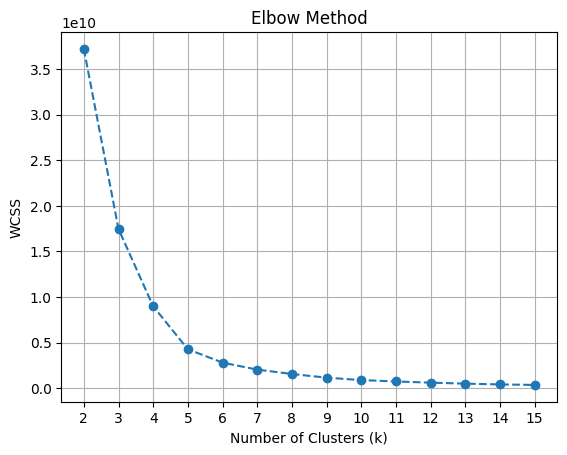

In [ ]:
#grouped the data by CustomerID and sum the Quantity to get purchase history of each customer
purchase_history = df.groupby('CustomerID')['Quantity'].sum().reset_index()

#using Within-Cluster Sum of Square method to find optimum K value
wcss = []

X = purchase_history[['Quantity']]


#WCSS for different values of k from 2 to 15
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)

    #Inertia is the sum of squared distances of every point to its centroid
    #it basically shows how internally coherent the clusters are
    #lower inertia value = more compact clusters
    wcss.append(kmeans.inertia_)


#elbow method graph
#We choose that value of k from where the graph starts to look like a straight line.
plt.plot(range(2, 16), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

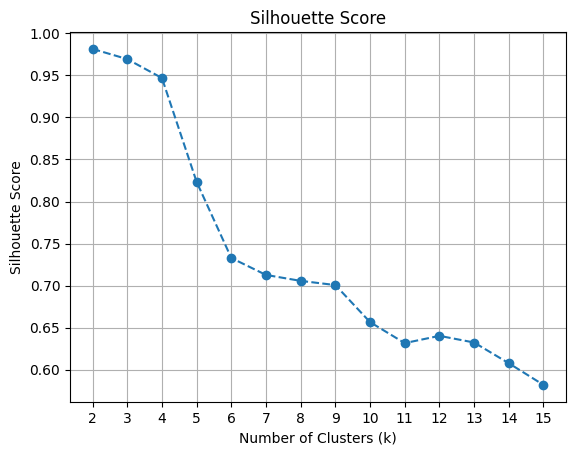

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette scores for different values of k from 2 to 15
silhouette_scores = []

#higher Silhouette Coefficient is better
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting the silhouette scores
plt.plot(range(2, 16), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 16))
plt.grid(True)
plt.show()

In [ ]:
# Find the K value with the highest silhouette coefficient
best_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because range starts from 2

# Compare with the K value suggested by the elbow method
best_k_elbow = wcss.index(min(wcss)) + 2  # Adding 2 because range starts from 2

# Determine the best K value based on both methods
if best_k_silhouette == best_k_elbow:
    print("Best K value based on both methods:", best_k_silhouette)
else:
    print("Different K values suggested by Silhouette Coefficient and Elbow Method.")
    print("Best K value based on Silhouette Coefficient:", best_k_silhouette)
    print("Best K value based on Elbow Method:", best_k_elbow)

Different K values suggested by Silhouette Coefficient and Elbow Method.
Best K value based on Silhouette Coefficient: 2
Best K value based on Elbow Method: 15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


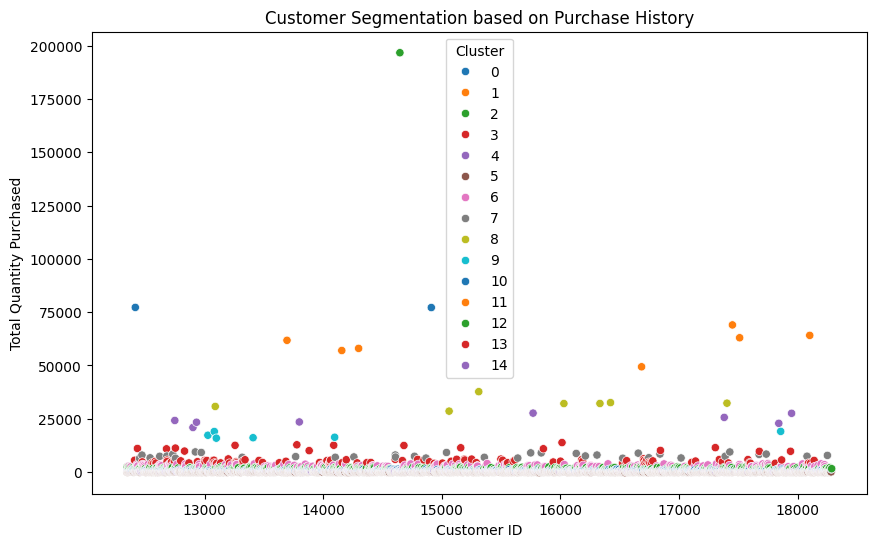

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


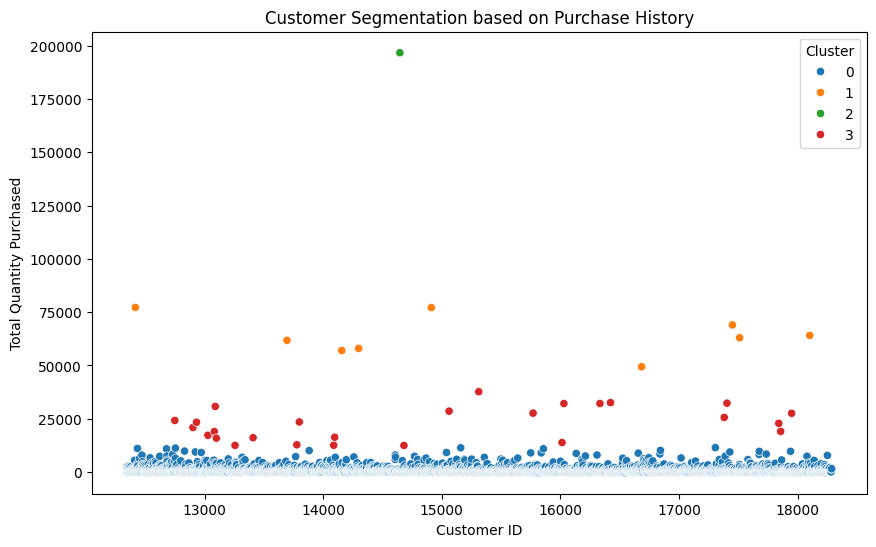

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


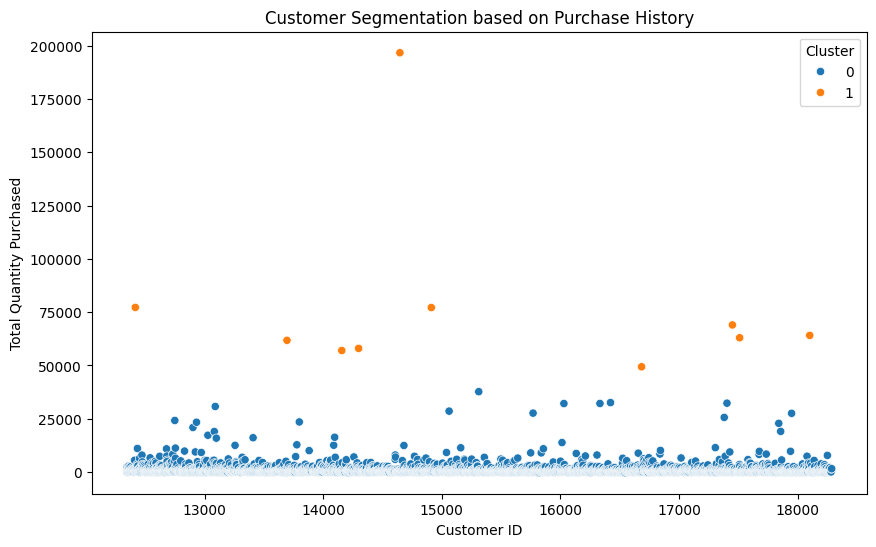

In [ ]:
kmeans = KMeans(n_clusters=15, random_state=42)
kmeans.fit(X)

#cluster labels:
purchase_history['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=purchase_history, x='CustomerID', y='Quantity', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation based on Purchase History')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.show()


kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

#cluster labels:
purchase_history['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=purchase_history, x='CustomerID', y='Quantity', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation based on Purchase History')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.show()


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

#cluster labels:
purchase_history['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=purchase_history, x='CustomerID', y='Quantity', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation based on Purchase History')
plt.xlabel('Customer ID')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.show()

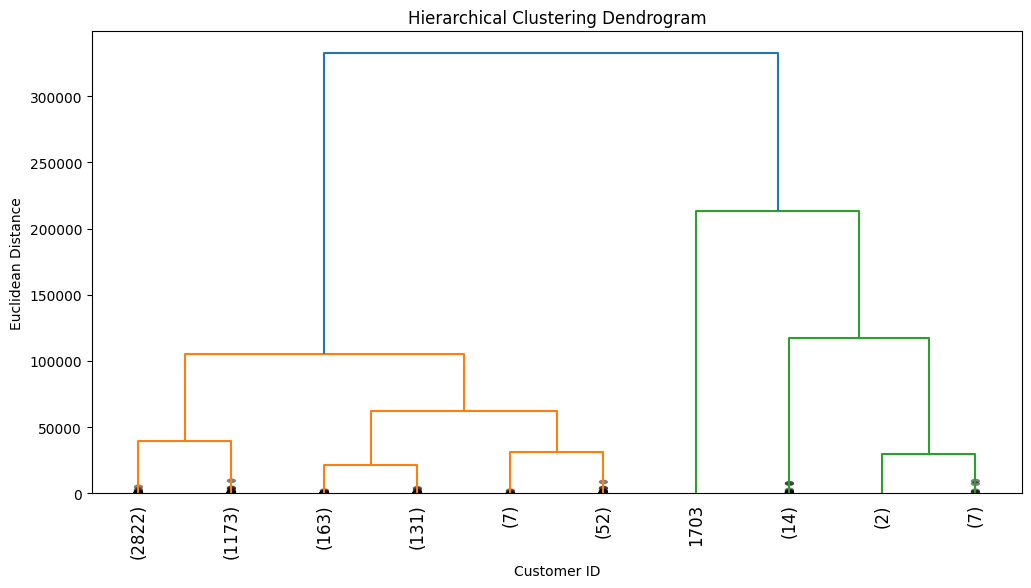

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Preprocess the data
# Here, we'll focus on purchase history, so we'll group the data by CustomerID and sum the Quantity
purchase_history = df.groupby('CustomerID')['Quantity'].sum().reset_index()

# Select features for clustering (purchase history)
X = purchase_history[['Quantity']]

# Perform hierarchical clustering
Z = linkage(X, method='ward')  # Using Ward's method for linkage

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=10, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer ID')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
#we are going to assign numeric labels to Country; to observe the correlation in the next cell

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Country_Label'] = label_encoder.fit_transform(df['Country'])

#Now 'Country' has been converted to numeric labels in a new column 'Country_Label'

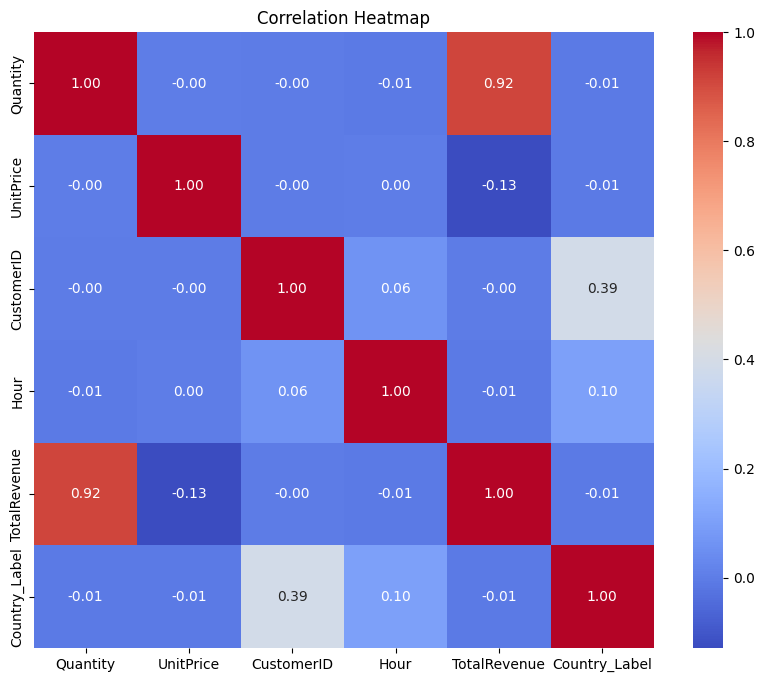

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()